In [3]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf


In [4]:
# starting="2021-08-19"
# ending="2023-11-26"
# data = yf.download("CHPT", starting, ending)

#import the data
data = pd.read_csv(file_path, header=0)
data['Date'] = data.index

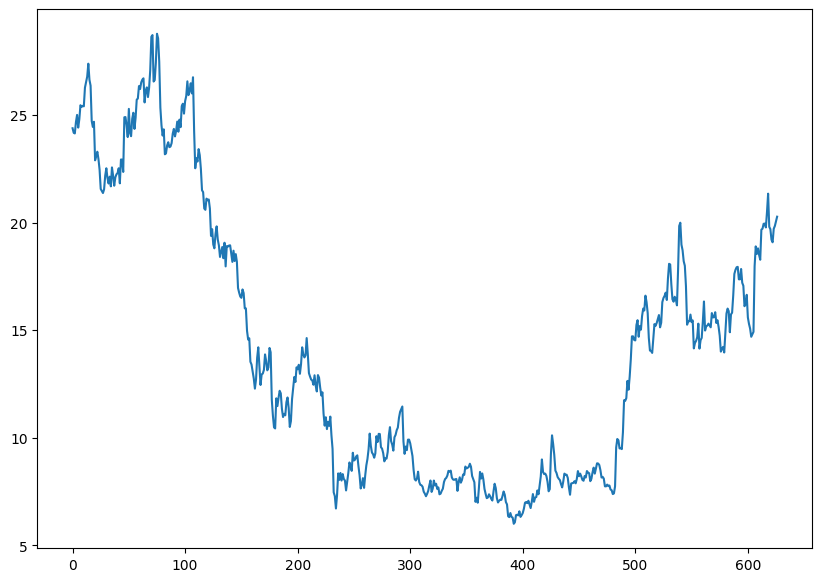

In [5]:
plt.figure(figsize=(10,7))
plt.plot(data['Date'],data['Close'])
close_price = data['Close']


In [6]:
#Feature Scaling (Apply MinMax Scaler)
#Since LSTM model is sensitive to scale of data apply scaler to transform values between 0 and 1

scaler = MinMaxScaler(feature_range=(0,1))
close_price = scaler.fit_transform(np.array(close_price).reshape(-1,1))
close_price

array([[0.80720241],
       [0.79797979],
       [0.79666223],
       [0.8199385 ],
       [0.83443125],
       [0.80851996],
       [0.82564773],
       [0.85419413],
       [0.85068074],
       [0.85287658],
       [0.85199821],
       [0.89020641],
       [0.90162496],
       [0.91260432],
       [0.93895471],
       [0.90601663],
       [0.89415899],
       [0.82213434],
       [0.80983751],
       [0.82037769],
       [0.74176544],
       [0.75010978],
       [0.75933248],
       [0.74440055],
       [0.72244183],
       [0.68335525],
       [0.67940268],
       [0.675011  ],
       [0.68247697],
       [0.7105841 ],
       [0.72551604],
       [0.70575316],
       [0.69433461],
       [0.70838818],
       [0.68862538],
       [0.72727269],
       [0.7105841 ],
       [0.68994285],
       [0.70707071],
       [0.71321912],
       [0.71585415],
       [0.72551604],
       [0.6947738 ],
       [0.74352218],
       [0.74308299],
       [0.71805007],
       [0.82960031],
       [0.830

In [7]:
#Split into test and train data
train_size = int(len(close_price)*0.7)
test_size = len(close_price) - train_size
train_data, test_data = close_price[0:train_size,:],close_price[train_size:len(close_price),:1]

In [8]:
#Convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [9]:
#Reshaping of dataset
time_step = 100
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

In [10]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

In [11]:
#Creating the stacked LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [12]:
#Creating LSTM Model
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.fit(X_train,Y_train,validation_split=0.1,epochs=30,batch_size=64,verbose=1)

Epoch 1/30
5/5 [==============================] - 7s 451ms/step - loss: 0.0472 - val_loss: 0.0088
Epoch 2/30
5/5 [==============================] - 1s 206ms/step - loss: 0.0171 - val_loss: 0.0017
Epoch 3/30
5/5 [==============================] - 1s 185ms/step - loss: 0.0097 - val_loss: 0.0011
Epoch 4/30
5/5 [==============================] - 1s 170ms/step - loss: 0.0071 - val_loss: 9.4673e-04
Epoch 5/30
5/5 [==============================] - 1s 172ms/step - loss: 0.0052 - val_loss: 0.0013
Epoch 6/30
5/5 [==============================] - 1s 166ms/step - loss: 0.0036 - val_loss: 0.0031
Epoch 7/30
5/5 [==============================] - 1s 186ms/step - loss: 0.0038 - val_loss: 0.0028
Epoch 8/30
5/5 [==============================] - 1s 202ms/step - loss: 0.0035 - val_loss: 0.0021
Epoch 9/30
5/5 [==============================] - 1s 168ms/step - loss: 0.0032 - val_loss: 0.0020
Epoch 10/30
5/5 [==============================] - 1s 201ms/step - loss: 0.0031 - val_loss: 0.0015
Epoch 11/30
5/5

In [14]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

3/3 [==============================] - 0s 43ms/step


In [15]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [16]:
#Prediction
pred_input = test_data[len(test_data)-100:].reshape(1,-1)
pred_input.shape

(1, 100)

In [17]:
temp_input=list(pred_input)
temp_input=temp_input[0].tolist()

In [18]:
lst_output=[] #predicted 30 days output
n_steps=100
i=0
while(i<int(duration)): 

    if(len(temp_input)>100):
        pred_input=np.array(temp_input[1:]) # for last 100 data 
        print("{} day input {}".format(i, pred_input)) 
        pred_input = pred_input.reshape(1,-1)
        pred_input = pred_input.reshape((1, n_steps, 1)) 
        yhat = model.predict(pred_input, verbose=0) 
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        pred_input = pred_input.reshape((1, n_steps, 1)) 
        yhat = model.predict(pred_input, verbose=0) 
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

print(lst_output)

[0.55850047]


101
1 day input [0.4567413  0.50065873 0.5305226  0.52920505 0.48880101 0.45805885
 0.45322791 0.4633289  0.45805885 0.44576194 0.51866488 0.6078173
 0.6144049  0.56960909 0.55819055 0.53579273 0.52657003 0.48484852
 0.40623627 0.41326305 0.41326305 0.42687747 0.41150635 0.41501975
 0.35792707 0.36890643 0.37329819 0.38076416 0.40843215 0.35748793
 0.3746157  0.37944665 0.41282387 0.45366709 0.39437854 0.40316206
 0.40447957 0.40843215 0.40447957 0.40096618 0.42995168 0.4211682
 0.42160739 0.43170838 0.40974966 0.41545893 0.40184451 0.38383837
 0.35133947 0.35704875 0.36100132 0.34958278 0.38866931 0.42907335
 0.43917434 0.43390426 0.39086515 0.42731662 0.43083005 0.46596401
 0.50988144 0.51822569 0.52349582 0.52437419 0.49890208 0.49890208
 0.51998243 0.4918753  0.4857268  0.44400529 0.44795786 0.46728147
 0.4211682  0.40799296 0.39833112 0.38164249 0.38647343 0.39174352
 0.52569166 0.5660957  0.55072467 0.56214313 0.54852874 0.53886694
 0.60035133 0.60210798 0.61220906 0.61264824 0.6

In [19]:
day_new = np.arange(1,101)
day_pred = np.arange(101, 101 + int(duration))
len(close_price)

627

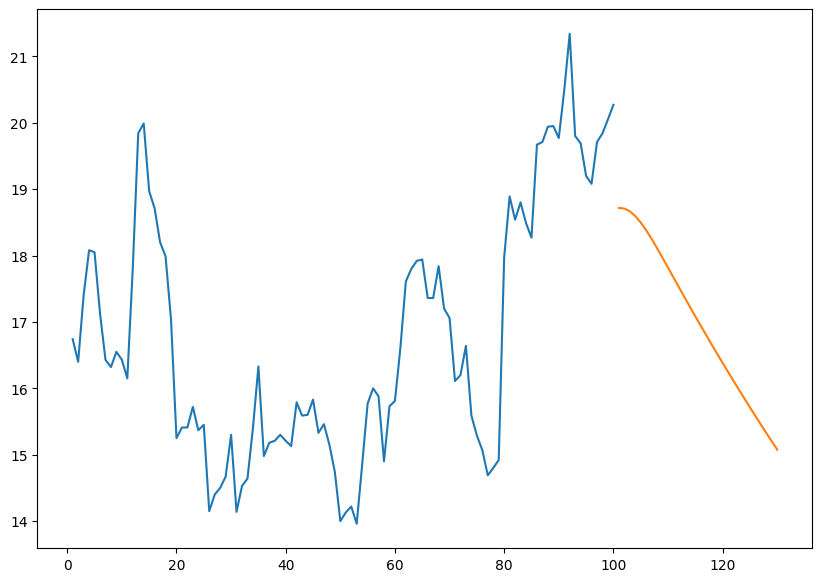

In [24]:
plt.figure(figsize=(10,7))
plt.plot(day_new,scaler.inverse_transform(close_price[len(close_price)-100:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [25]:
#Make continous graph

df3 = close_price.tolist()
df3.extend(lst_output)
print(len(df3))

657


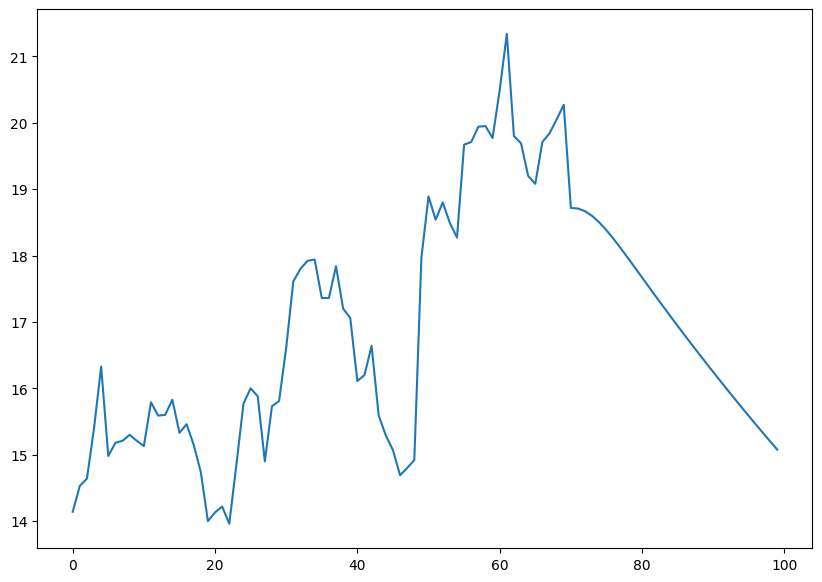

In [26]:
plt.figure(figsize=(10,7))
prediction = scaler.inverse_transform(df3[len(df3)-100:])
plt.plot(prediction)

In [ ]:
with open('data_file.txt', 'w') as file:
    file.write(','.join(map(str, prediction)))